In [1]:
import sys
sys.path.insert(0, '../asyncroscopy/clients/')
from tem_client import TEMClient
import matplotlib.pyplot as plt


In [2]:
# connecting the TEMClient to the central (async) server
tem = TEMClient.connect(host='localhost',port=9000)


Connecting to central server localhost:9000...
Connected to central server.


In [3]:
# connection from central server to the AS server
# tem.connect_AS(host="127.0.0.1", port=9095)
tem.connect_AS("localhost", 9001)

[client] sending: AS_connect_AS localhost 9001
[client] sent: AS_connect_AS localhost 9001


"Error communicating with backend: [Failure instance: Traceback (failure with no frames): <class 'twisted.internet.error.ConnectionRefusedError'>: Connection was refused by other side: 61: Connection refused.\n]"

In [4]:
tem.get_status()

[client] sending: AS_get_status
[client] sent: AS_get_status


'Microscope is Ready'

### Getting an image takes 5 seconds:

[client] sending: AS_get_scanned_image HAADF 512 1e-05
[client] sent: AS_get_scanned_image HAADF 512 1e-05


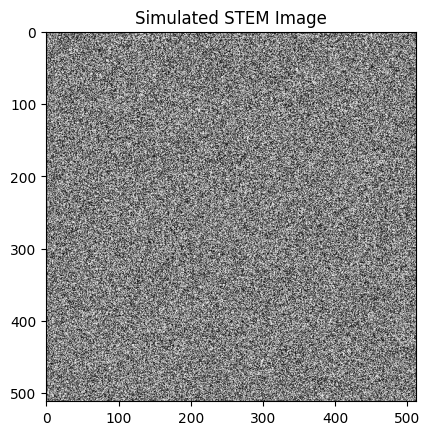

In [10]:
# works with images upt to size = 300 - working on it
img = tem.get_scanned_image(scanning_detector='HAADF', size=512, dwell_time=10e-6)

plt.imshow(img, cmap="gray")
plt.title("Simulated STEM Image")
plt.show()


### Getting a spectrum takes 3 seconds:

[client] sending: Gatan_get_spectrum 512
[client] sent: Gatan_get_spectrum 512


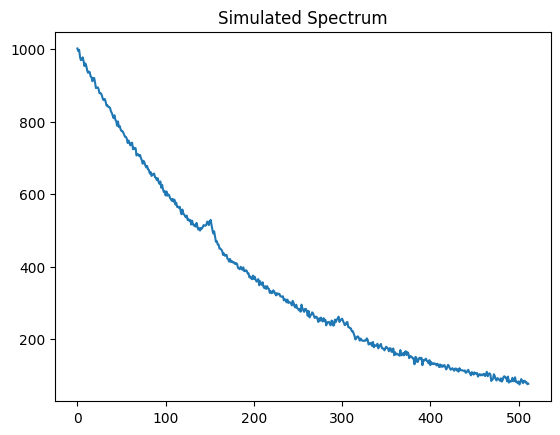

In [6]:
spec = tem.get_spectrum(512)

plt.plot(spec)
plt.title("Simulated Spectrum")
plt.show()

### Why not both at once?

[client] sending:[client] sending: Gatan_get_spectrum 512
 AS_get_scanned_image Haadf 200 1e-05
[client] sent: Gatan_get_spectrum 512
[client] sent: AS_get_scanned_image Haadf 200 1e-05


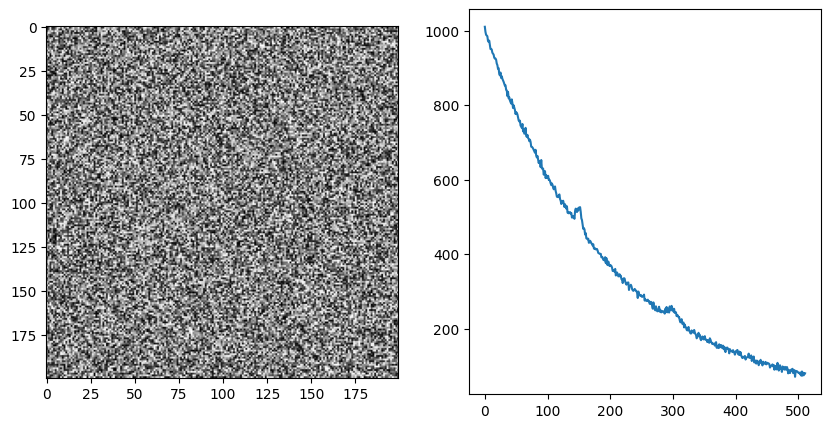

In [7]:
image, spec = tem.get_image_and_spectrum(image_size = 512, image_dwell_time = 10e-6,
                                spectrum_size = 512, spectrum_dwell_time = 2e-6)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(image, cmap="gray")

ax[1].plot(spec)

